In [11]:
import torch
import numpy as np

import matplotlib.pyplot as plt
from tqdm import tqdm

# Aggregate Correlation

In [32]:
# Choose the p for the l_p-MD optimization path
p = '1_75'
epochs = 1500

In [41]:
all_corrs_3 = np.zeros((100, epochs))
all_corrs_2 = np.zeros((100, epochs))
all_corrs_1_75 = np.zeros((100, epochs))

# Extract correlations from experimental results
for idx in tqdm(range(1, 101)):
    results = torch.load(f'result/correlation/1_75-{p}/W{idx}.pt')
    all_corrs_1_75[idx-1] = results
    results = torch.load(f'result/correlation/2-{p}/W{idx}.pt')
    all_corrs_2[idx-1] = results
    results = torch.load(f'result/correlation/3-{p}/W{idx}.pt')
    all_corrs_3[idx-1] = results

100%|██████████| 100/100 [00:00<00:00, 704.59it/s]


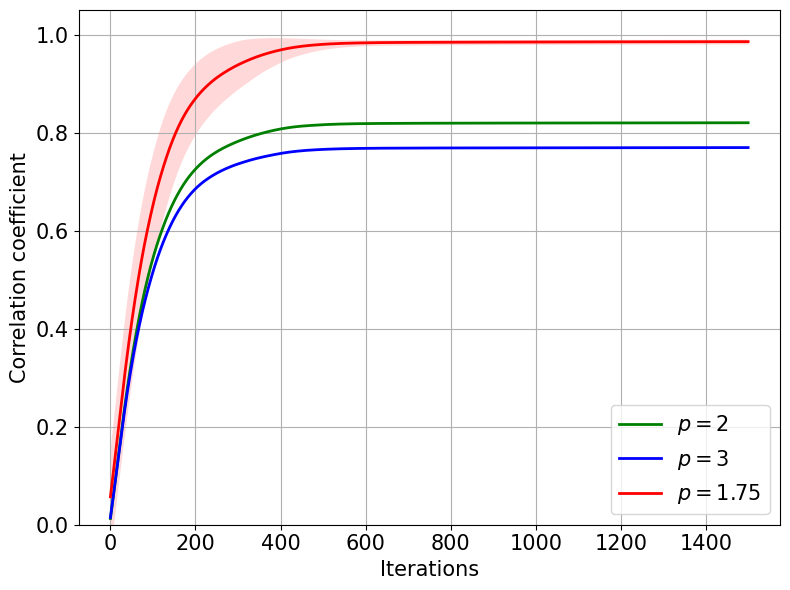

In [42]:
plt.figure(figsize=(8,6))

mean, std = all_corrs_2.mean(0)[:epochs], all_corrs_2.std(0)[:epochs]
plt.plot(mean[:epochs], color='g', linewidth=2, label=r'$p=2$')
# plt.fill_between(range(epochs), mean[:epochs]-std[:epochs], mean[:epochs]+std[:epochs], color='g', alpha=0.15, linewidth=0)

mean, std = all_corrs_3.mean(0)[:epochs], all_corrs_3.std(0)[:epochs]
plt.plot(mean[:epochs], color='b', linewidth=2, label=r'$p=3$')
# plt.fill_between(range(epochs), mean[:epochs]-std[:epochs], mean[:epochs]+std[:epochs], color='b', alpha=0.15, linewidth=0)

mean, std = all_corrs_1_75.mean(0)[:epochs], all_corrs_1_75.std(0)[:epochs]
plt.plot(mean, color='r', linewidth=2, label=r'$p=1.75$')
plt.fill_between(range(epochs), mean[:epochs]-std[:epochs], mean[:epochs]+std[:epochs], color='r', alpha=0.15, linewidth=0)

plt.legend(fontsize=15)
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Correlation coefficient', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 1.05])
plt.grid()
plt.tight_layout()
plt.savefig(f"images/p{p}.jpg")
plt.show()

# Single Experiment

In [9]:
def plot_directions(Ws, W_att, i, j, p, arrow_idx=[], head_width=1.5, head_length=1.5, filename='result.jpg'):
    """
    Given the evolution of the parameter as it is being trained along
    with the Attention-SVM solution, plot the parameter's directions during
    training and the Attention-SVM direction

    Input:
    - Ws        : the evolution of the parameters as it is being trained
    - W_att     : the Attention-SVM solution
    - i, j      : the entries indices to compare
    - arrow_idx : the indices where we want to add arrows

    Display:
    One graph with one curved line with arrows on it and one straight
    line. Add grids and legends for clarity
    """
    # Rescale Attention-SVM
    factor = ((Ws[-1, i[0], i[1]] ** 2 + Ws[-1, j[0], j[1]] ** 2) ** .5
        / (W_att[i[0], i[1]] ** 2 + W_att[j[0], j[1]] ** 2) ** .5)
    
    # Actual Plots
    plt.plot(Ws[:, i[0], i[1]], Ws[:, j[0], j[1]], label=f'l_{p}-MD')
    plt.plot([0, W_att[i[0], i[1]] * factor], [0, W_att[j[0], j[1]] * factor], label=f'l_{p}-Att-SVM')

    # Arrows
    for idx in arrow_idx:
        plt.arrow(
            Ws[idx, i[0], i[1]], Ws[idx, j[0], j[1]],
            Ws[idx+1, i[0], i[1]] - Ws[idx, i[0], i[1]],
            Ws[idx+1, j[0], j[1]] - Ws[idx, j[0], j[1]],
            length_includes_head=False, head_width=head_width, head_length=head_length,
            zorder=-1
        )

    # Display
    plt.grid()
    plt.legend(fontsize=15)
    plt.savefig(filename)
    plt.show()

In [6]:
# Extract results
result1_75 = torch.load('result/convergence/p1_75/SingleW')
result2 = torch.load('result/convergence/p2/SingleW')
result3 = torch.load('result/convergence/p3/SingleW')

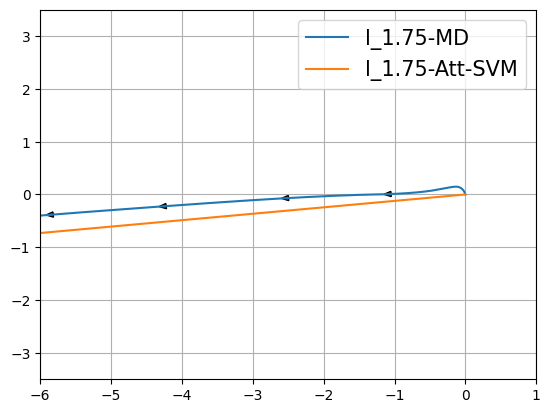

In [10]:
plt.xlim([-6, 1])
plt.ylim([-3.5, 3.5])
plot_directions(result1_75['Ws'], result1_75['att-svm'], (1, 2), (3, 4), 1.75, [140, 225, 310, 425], 0.1, 0.1, 'images/p1_75_instance.jpg')

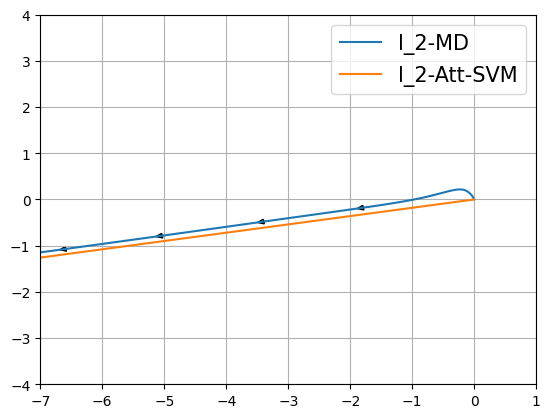

In [11]:
plt.xlim([-7, 1])
plt.ylim([-4, 4])
plot_directions(result2['Ws'], result2['att-svm'], (1, 2), (3, 4), 2, [300, 500, 700, 900], 0.1, 0.1, 'images/p2_instance.jpg')

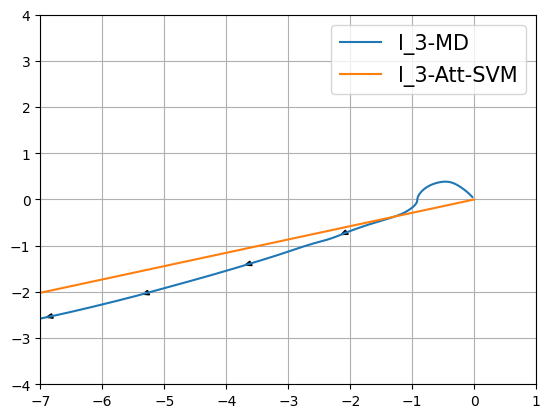

In [12]:
plt.xlim([-7, 1])
plt.ylim([-4, 4])
plot_directions(result3['Ws'], result3['att-svm'], (1, 2), (3, 4), 3, [1500, 4000, 8000, 13000], 0.1, 0.1, 'images/p3_instance.jpg')